In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#assigning variables for dataframe
df=pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9,10],'y':[100,200,500,600,900,920,940,980,1100,1500]})
df

,x,y
0,1,100
1,2,200
2,3,500
3,4,600
4,5,900
5,6,920
6,7,940
7,8,980
8,9,1100
9,10,1500


In [5]:
#it gives mean,std and IQR(inter quartile range) valuesdf.describe()

,x,y
count,10.00000,10.000000
mean,5.50000,774.000000
std,3.02765,425.524513
min,1.00000,100.000000
25%,3.25000,525.000000
50%,5.50000,910.000000
75%,7.75000,970.000000
max,10.00000,1500.000000


In [6]:
#checking dataset if any null values
df.isnull().sum()

x    0
y    0
dtype: int64

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


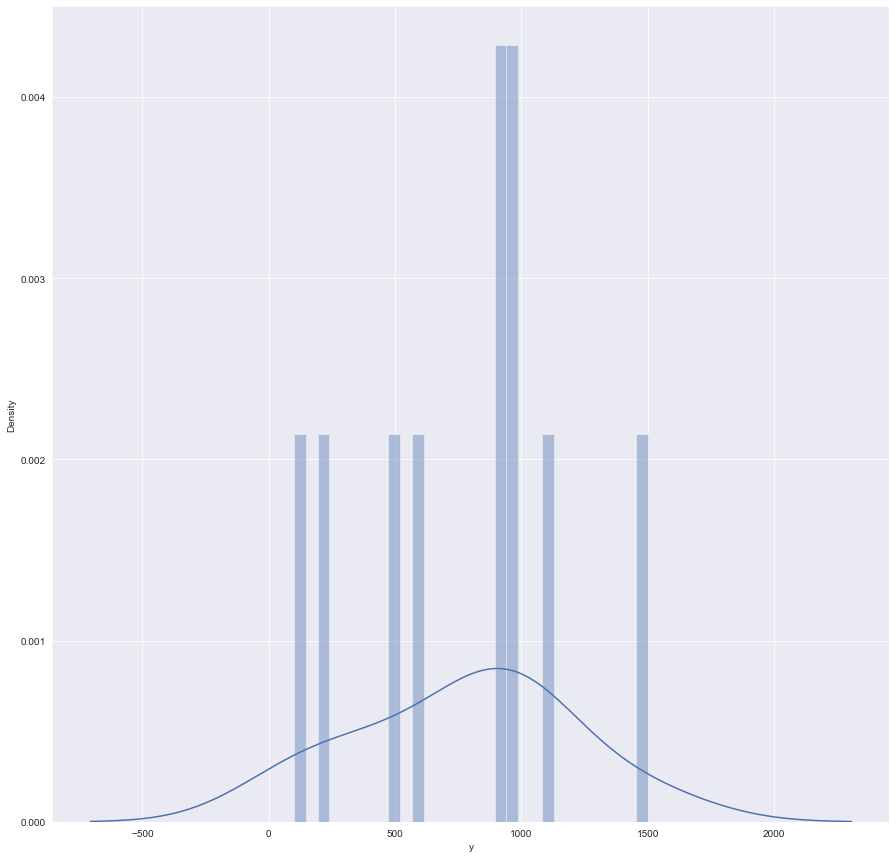

In [10]:
#plotting the graph
sns.set({'figure.figsize':(15,15)})
sns.distplot(df['y'],bins=30)
plt.show()

<AxesSubplot:>

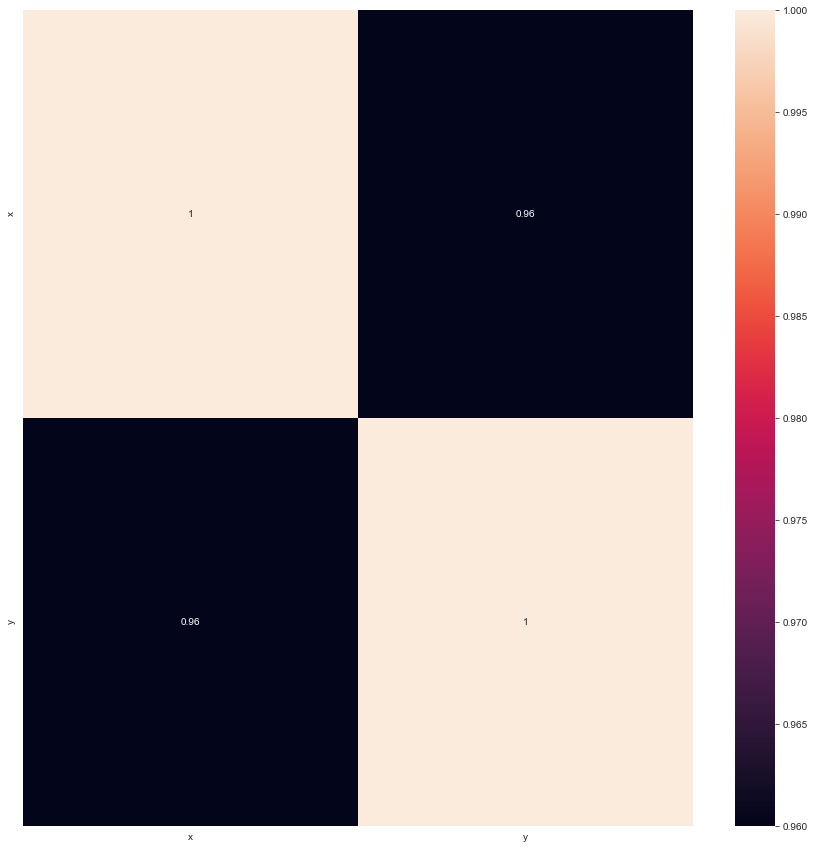

In [12]:
#visualizing correlation between x and y using heatmap
corr_matrix=df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

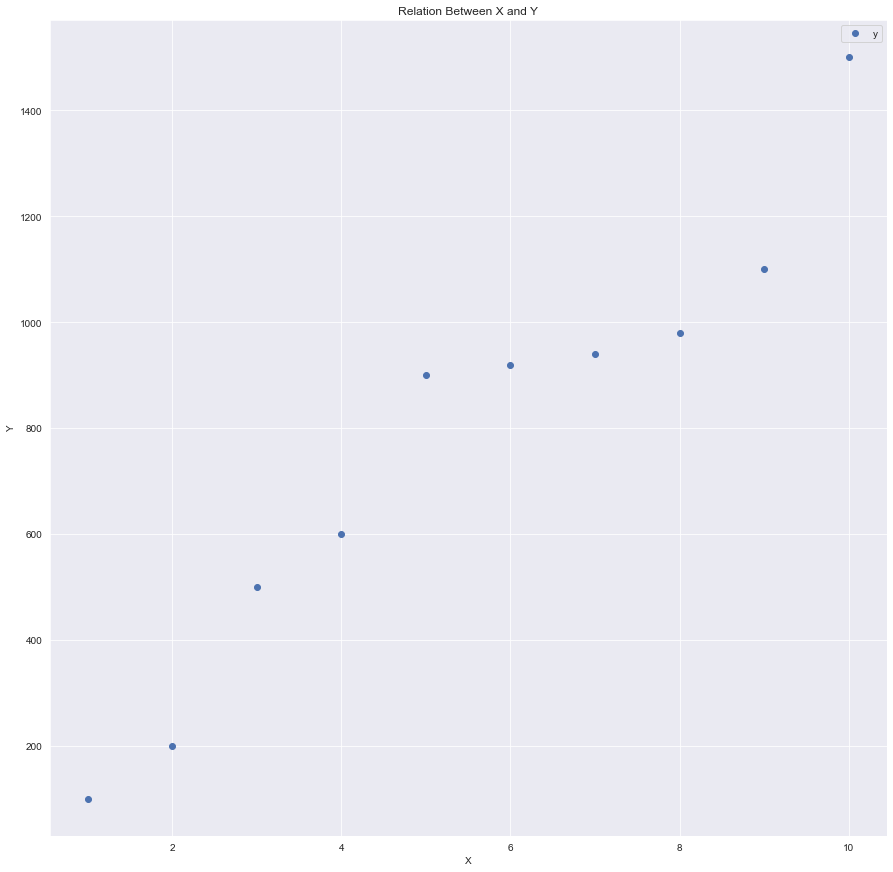

In [13]:
df.plot(x='x',y='y',style='o')
plt.title('Relation Between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
X=df['x']
Y=df['y']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7,)
(3,)
(7,)
(3,)


In [17]:
#importing  libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
#converting 1D to 2D by reshape function
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
Y_train=np.array(Y_train).reshape(-1,1)
Y_test=np.array(Y_test).reshape(-1,1)

In [19]:
#defining a variable for linear regression
linear_model=LinearRegression()

#applying model to training set
linear_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
#evaluating training set performance
Y_train_predict=linear_model.predict(X_train)
rmse=np.sqrt(mean_squared_error(Y_train,Y_train_predict))
r2=r2_score(Y_train,Y_train_predict)
print("model performance of training set")
print("RMSE is {}".format(rmse))
print("r2_score is {}".format(r2))

model performance of training set
RMSE is 106.4161865596807
r2_score is 0.9170013411910175


In [23]:
#evaluating testing set performance
Y_test_predict=linear_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,Y_test_predict))
r2=r2_score(Y_test,Y_test_predict)
print("model performance of test set")
print("RMSE is {}".format(rmse))
print("r2_score is {}".format(r2))

model performance of test set
RMSE is 142.59866274582734
r2_score is 0.8790260394288182


In [24]:
print("model coefficient is  ",linear_model.coef_ )
print("model intercept is  ",linear_model.intercept_)

model coefficient is   [[126.35416667]]
model intercept is   [38.75]


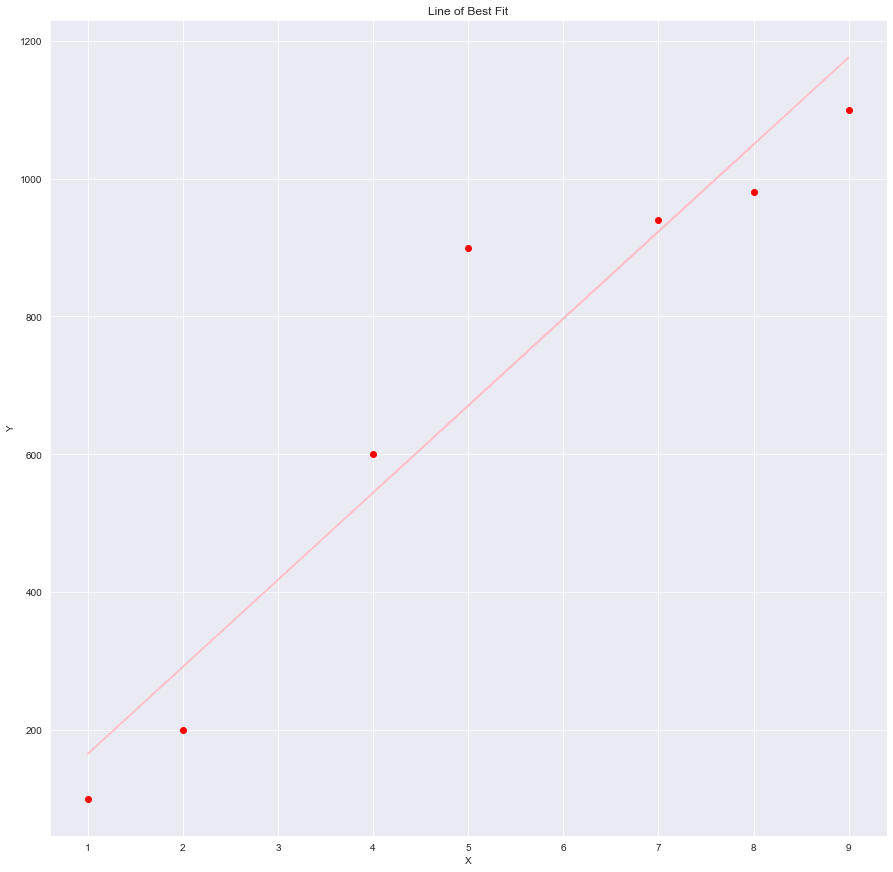

In [25]:
#best line of fit using training test using scatter plot
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,Y_train_predict,color="pink")
plt.title("Line of Best Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()